중요피처
  - ols모델보다는 머신러닝이용 피처중요도 선별
  - 상관계수 구해서 (선형모델이면 ) 높은 변수는 제거
    - vif (다중공선성)확인해서 높은 값은 제거하면서 피처선택


In [4]:
import pandas as pd

In [5]:
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/12%EC%A3%BC%EC%B0%A8/data/used_mobile_phone.csv'

In [6]:
df = pd.read_csv(filepath)
df.head(3)

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [8]:
# 년,월,일로 새로운 피처 생성
df['year'] = df['create_date'].apply(lambda x: x[:4])
df['month'] = df['create_date'].apply(lambda x: x[5:7])
df['day'] = df['create_date'].apply(lambda x: x[8:10])

In [9]:
df.head(3)

,create_date,price,text,phone_model,factory_price,maker,price_index,year,month,day
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017,03,19
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016,10,26
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016,10,25


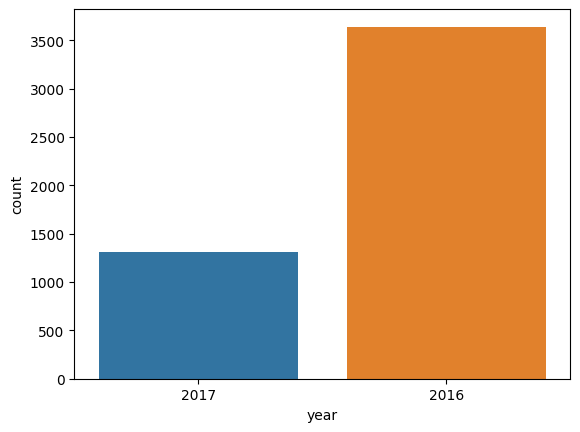

In [10]:
# 년도별 거래량 시각화
import seaborn as sns
import matplotlib.pyplot as plt
df['year'].value_counts()
sns.countplot(df, x='year')
# plt.bar(df['year'].value_counts())
# sns.countplot( df['year'].value_counts())
plt.show()

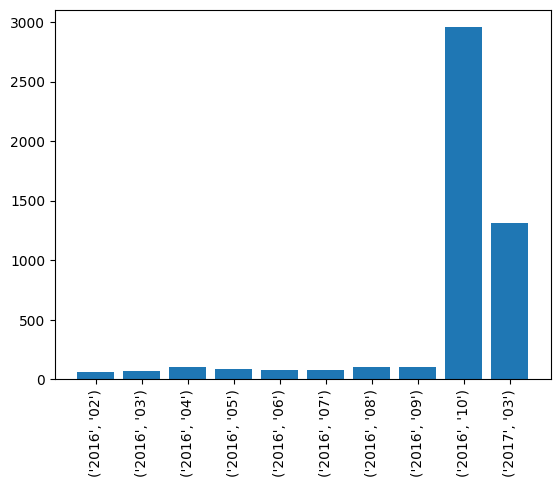

In [11]:
# 연도별 월별
new_df = df.groupby(['year','month'])['month'].count()
new_df.index, new_df.values
plt.bar(range(len(new_df.index)), new_df.values)
plt.xticks(range(len(new_df.index)), new_df.index, rotation=90)
plt.show()

<Axes: >

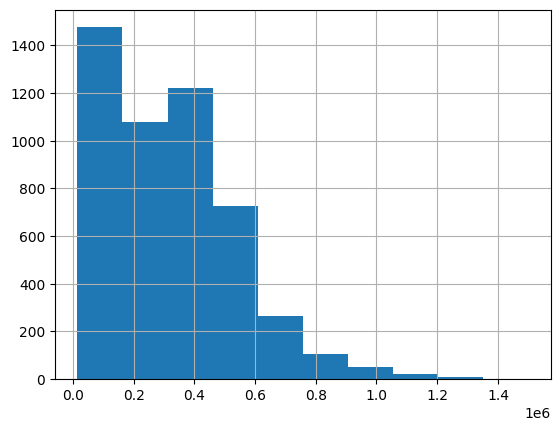

In [13]:
# 가격 피처 탐색
df['price'].hist()

In [18]:
#핸드폰 기종별 평균과 표준편차
  # 기종별 표준편차는 시장에서의 가격 변동성 및 시장동향
  # 적정한 가격 책정
  # 고객 인사이트 확보
import numpy as np
df_price_mean = df.groupby('phone_model')['price'].transform(lambda x: np.mean(x))
df_price_std = df.groupby('phone_model')['price'].transform(lambda x: np.std(x))

<Axes: >

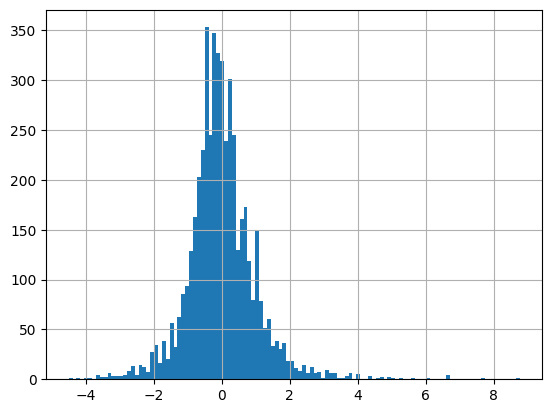

In [21]:
# z-score : 통계학에서 특정 데이터가 평균과 떨어진 정도 - 데이터내에서 어떤위치에 있는지 나타내는데 사용
#  (X - 평균) / 표준편차
# 해당 가격이 기종별 평균에 비해 어느정도로 높거나 낮은지를 알수있음
df_price_z_score = (df['price']-df_price_mean) / df_price_std
df_price_z_score.hist(bins='auto')

<Axes: >

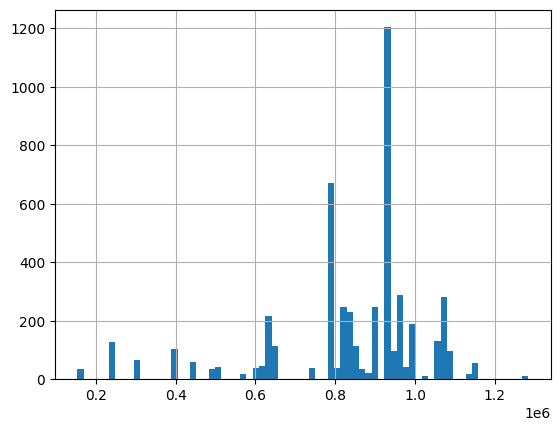

In [22]:
# 출고가 피처 탐색
df['factory_price'].hist(bins='auto')

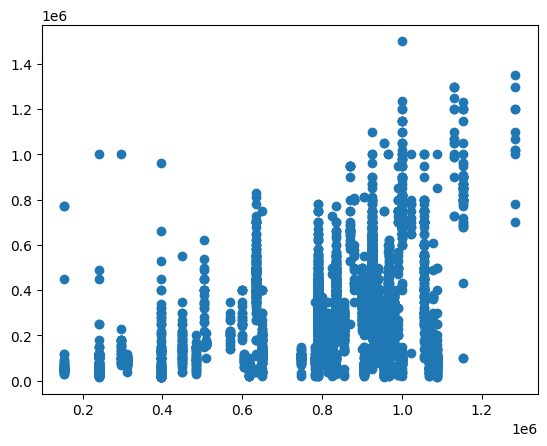

In [23]:
# 출고가와 중고거래가격의 상관관계
plt.scatter(df['factory_price'], df['price'])
plt.show()

In [25]:
# 핸드폰의 모델 탐색
model_counts = df['phone_model'].value_counts()
print(model_counts)
model_counts.describe()

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 7 plus 32gb       12
iphone 6s Plus 16gb      12
iphone 4s 16gb           11
iphone 7 plus 256gb      11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64


count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64

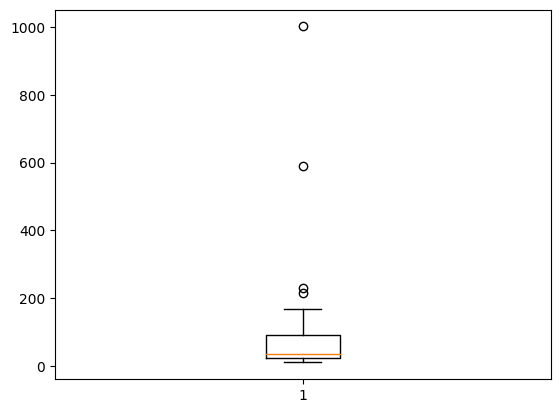

In [26]:
plt.boxplot(model_counts)
plt.show()

In [27]:
# Random Forest를 이용한 가격 예측
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,year,month,day
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017,03,19
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016,10,26
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016,10,25
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017,03,23
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016,04,11


In [29]:
# 필요한 라이브러리 인스톨
from sklearn.model_selection import train_test_split
# 사전형태의 데이터를 벡터화 - 모델에 사용가능  범주형 데이터를 수치형으로 변환
from sklearn.feature_extraction import DictVectorizer

In [31]:
data = [
    {'color':'red','size':'small'},
    {'color':'green','size':'medium'},
    {'color':'blue','size':'large'}
]
v = DictVectorizer()
print(v.fit_transform(data))

  (0, 2)	1.0
  (0, 5)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (2, 3)	1.0


In [33]:
from sklearn.metrics import r2_score,  mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [35]:
df2 = df[['price','phone_model','factory_price','maker','price_index','year','month']]
df2 = pd.get_dummies(df2)
X = df2.iloc[:,1:]
y = df2.iloc[:,0]
X.shape, y.shape

((4951, 85), (4951,))

In [36]:
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
x_train_predict = forest.predict(x_train)
x_test_predict = forest.predict(x_test)

In [41]:
np.sqrt(mean_squared_error(y_train,x_train_predict)), np.sqrt( mean_squared_error(y_test,x_test_predict))

(107044.51200837664, 110630.26903533585)

In [42]:
r2_score(y_train,x_train_predict), r2_score(y_test,x_test_predict)

(0.7525942271081845, 0.7491867495542569)

[('factory_price', 0.3735815112887165),
 ('maker_apple', 0.28540034375740514),
 ('phone_model_iphone se 64gb', 0.0256427759512987),
 ('phone_model_galaxy s4 32gb', 0.022305382425698666),
 ('phone_model_iphone 6 64gb', 0.02223874938368175),
 ('phone_model_galaxy s3 3g 8gb', 0.018647035746208736),
 ('price_index', 0.01825545463820577),
 ('phone_model_galaxy s7 edge 32gb', 0.01721499923716777),
 ('phone_model_iphone 6 128gb', 0.017180487451189618),
 ('maker_samsung', 0.014594961471842522)]

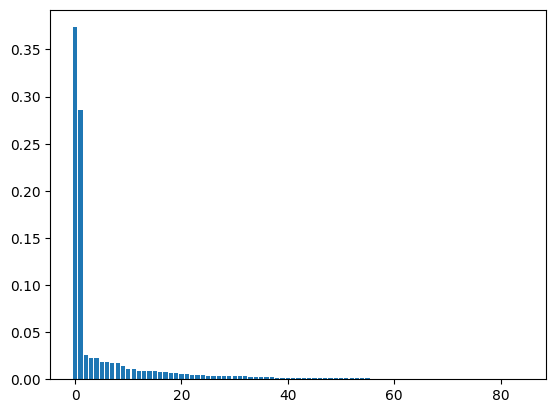

In [48]:
# 피처 중요도 분석
# 학습모델의 피처 중요도를 시각화
importance = forest.feature_importances_
indexs = np.argsort(importance)[::-1]
plt.bar(range(X.shape[1]), importance[indexs])

# 피처명을 출력
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, importance))
sorted(feature, key = lambda x: x[1], reverse=True)[:10]

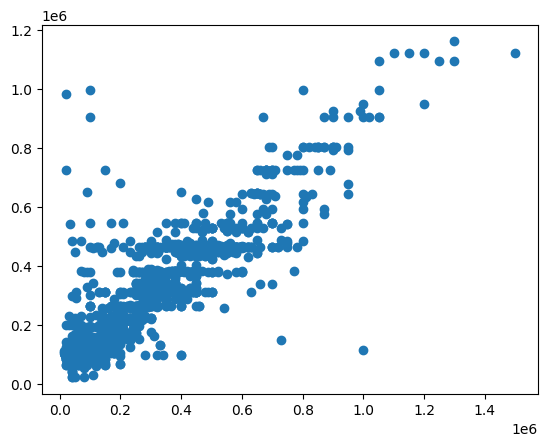

In [50]:
# 예측결과 scatter plot
plt.scatter(y_test, x_test_predict)

개선

In [51]:
df = pd.read_csv(filepath)
df.head(3)

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05


In [53]:
# 얼마나 오래되었는지에 대한 점수화(수치화)
from datetime import datetime
import time

In [65]:
# 시간을 unixtime으로 변환
def date_to_unixtime(strDate):
  return time.mktime( datetime.strptime(strDate, '%Y-%m-%d').timetuple())

In [68]:
date_to_unixtime('2017-03-19'), date_to_unixtime('2020-09-11'), date_to_unixtime('2023-09-11')

(1489881600.0, 1599782400.0, 1694390400.0)

In [69]:
df['create_unixtime'] = df['create_date'].apply(lambda x : date_to_unixtime(x[:10]) )
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489882e+09
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477440e+09
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477354e+09
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490227e+09
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460333e+09


In [72]:
df['phone_model'].value_counts().index

Index(['iphone 6 64gb', 'iphone 6 16gb', 'galaxy note3 32gb', 'iphone se 64gb',
       'galaxy note5 32gb', 'iphone 5s 16gb', 'wine smart jazz 4gb',
       'lg g5 32gb', 'galaxy s6 32gb', 'galaxy s7 32gb', 'galaxy s4 32gb',
       'iphone 6 128gb', 'galaxy s7 edge 32gb', 'lg u 32gb',
       'galaxy note 2 32gb', 'g4 32gb', 'iphone 7 128gb', 'galaxy s3 3g 8gb',
       'g3 cat.6 32gb', 'galaxy s6 64gb', 'galaxy note4 32gb',
       'iphone 7 plus 128gb', 'galaxy note5 64gb', 'optimus g 32gb',
       'lg g2 32gb', 'galaxy note7 64gb', 'galaxy s6 edge 32gb',
       'galaxy a8 2016 32gb', 'galaxy alpha 32gb', 'iphone 5 16gb',
       'galaxy grand max 16gb', 'g pro2 32gb', 'y6 8gb', 'vega iron2 32gb',
       'galaxy s6 edge plus 32gb', 'iphone 7 32gb', 'galaxy note3 neo 16gb',
       'iphone 5s 32gb', 'galaxy folder 8gb', 'iphone 6s Plus 64gb',
       'luna 16gb', 'galaxy s5 32gb', 'galaxy s6 edge 64gb',
       'galaxy s7 edge 64gb', 'im-100 32gb', 'iphone se 16gb',
       'galaxy note3 16gb'

In [75]:
df['phone_model_storage'] = df['phone_model'].apply(lambda x : x.split()[-1])
df['phone_model_detail'] = df['phone_model'].apply(lambda x :  ' '.join(x.split()[:-1])  )

In [ ]:
df.head()

{'whiskers': [<matplotlib.lines.Line2D at 0x7db023797a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7db0237973a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7db023795c60>],
 'medians': [<matplotlib.lines.Line2D at 0x7db023cd3df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7db023cd1ba0>],
 'means': []}

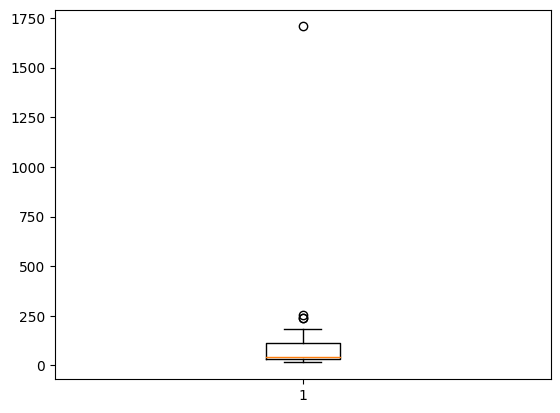

In [79]:
# phone_model_detail 별 거래현황  boxplot
plt.boxplot(df['phone_model_detail'].value_counts())

-1.3966616903783375 1.666982156397844


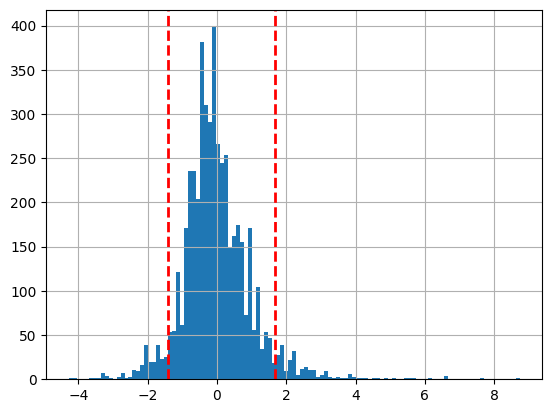

In [81]:
# 텍스트분석(감성)
# z-score를 이용해서 평균에 비해 얼마나 떨어져있는지를 점수화
df['price_by_group'] = df.groupby('phone_model_detail')['price'].transform(lambda x: (x - x.mean()) / x.std())
# z-score를 그래프로그려본다.
ax = df['price_by_group'].hist(bins='auto')
# z-score를 기준으로 상.하위 5%에 해당하는 점수를 lower_b, uppper_b 지정
lower_b = df['price_by_group'].quantile(0.05)
upper_b = df['price_by_group'].quantile(0.95)

ax.axvline(x = lower_b, color='r', linestyle='dashed',linewidth=2)
ax.axvline(x = upper_b, color='r', linestyle='dashed',linewidth=2)

print(lower_b,upper_b)

In [83]:
# 0 1 2
def get_price_level(price,lower,upper):
  if price >= upper:
    return "2"
  elif price >= lower:
    return "1"
  else:
    return "0"

In [86]:
df['price_lower'] = df.groupby('phone_model_detail')['price'].transform(lambda x : x.quantile(0.05))
df['price_upper'] = df.groupby('phone_model_detail')['price'].transform(lambda x : x.quantile(0.95))
df['price_level'] = df.apply(lambda x : get_price_level(x['price'],x['price_lower'],x['price_upper']), axis=1 )

In [88]:
df[['price','price_lower','price_upper','price_level','text']].tail()

,price,price_lower,price_upper,price_level,text
4946,1300000.0,628200.0,1200000.0,2,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...
4947,1300000.0,597000.0,1200000.0,2,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...
4948,1300000.0,597000.0,1200000.0,2,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91..."
4949,1350000.0,628200.0,1200000.0,2,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...
4950,1500000.0,597000.0,1200000.0,2,"팝니다 아이폰 7 128gb 제트블랙 북미판 카메라 무음, 국내리퍼 가능 1..."


In [90]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 31.1 MB/s eta 0:00:00


In [91]:
from konlpy.tag import Okt

In [92]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [95]:
# 특수문자를 제거한 형태로 분류함수
def get_pos(x):
  okt = Okt()
  poses = okt.pos(x)
  return [pos[0] for pos in poses if pos[0] not in string.punctuation]

In [108]:
# 형태소 리스트의 리스트를 전부 합친다
corpus =  sum(df['text'].apply(lambda x : get_pos(x)).tolist(), [])

In [109]:
# 가장 많이 등장한 형태소 2000개를 추출한다
from collections import Counter
counter =  Counter(corpus)
common_words =  counter.most_common(10)
common_words

[('사용', 22),
 ('거래', 22),
 ('입니다', 19),
 ('는', 17),
 ('은', 16),
 ('기', 15),
 ('팝니다', 15),
 ('블랙', 13),
 ('6', 12),
 ('가', 12)]

In [110]:
 # TF-IDF 벡터
 # TF(단어빈도) : 문서에서 특정단어가 나타내는 빈도
 # IDF : 특정단어의 중요성을 문서 전체집합에서 빈도와 관련시킴

In [111]:
df['price_level'].value_counts()

1    4405
2     321
0     225
Name: price_level, dtype: int64

In [ ]:
from pandas.core.common import random_state
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# 가장 많이 등장한 형태소를 제외한 모든 형태소를 제거하는 함수
def get_common_pos(x):
  okt = Okt()
  poses = okt.pos(x)
  return [pos[0]  for pos in  poses if pos[0] in common_words]

# price 기준으로 랜덤샘플링 1:3:1
negative_random =  df[df['price_level'] == '0'].sample(321,random_state=42)
normal_random =  df[df['price_level'] == '1'].sample(321*3,random_state=42)
positive_random =  df[df['price_level'] == '2'].sample(321,random_state=42)

# 샘플링해서 추출한 데이터를 합친다
df_sample = negative_random.append(normal_random).append(positive_random)

# TF-IDF를 수행
index_vectorizer =  CountVectorizer(tokenizer=lambda x : get_common_pos(x))
X = index_vectorizer.fit_transform(df_sample['text'].tolist())
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

# 감성분류위한 학습 데이터셋을 정의
y = df_sample['price_level']
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)
print(x_train.shape, x_test.shape)